# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

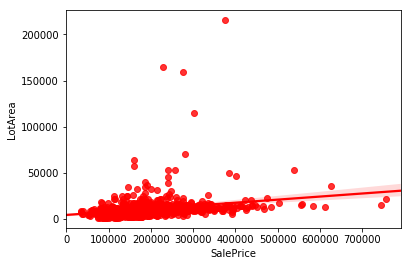

In [36]:
sns.regplot('SalePrice', 'LotArea', data=df, color='red')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [37]:
target = 'SalePrice'

In [38]:
corr = df.corr()
corr.sort_values(target, ascending = False, inplace = True)
print(corr.SalePrice[:8])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64


In [39]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF']

In [40]:
model = sm.OLS(df[target], sm.add_constant(df[features]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     924.4
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        18:54:20   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.946e+04   4664.407    -21.323      

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

Excluding 'FullBath' all of the included features coefficient's p-value is < 0.001, thus for those features the null hypothesis can be rejected and the conclusion drawn that there is a signficant relationship between changes in these features and the sale price of a home. 

Given the p-value for the 'FullBath' feature is 0.65, based on this test the null hypothesis should be accepted. Thus the test indicates there is not a signficant relationship between FullBath and the sale price of a home. Given that this conclusion seems out of step with intuition, this feature bears further investigation. 

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [41]:
# Remove outliers from tested features
df = df[ (np.abs(stats.zscore(df[features])) < 3).all(axis=1) ]

In [51]:
model = sm.OLS(df[target], sm.add_constant(df[features]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1114.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        18:55:26   Log-Likelihood:                -16976.
No. Observations:                1437   AIC:                         3.396e+04
Df Residuals:                    1431   BIC:                         3.399e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.958e+04   4114.907    -24.199      

The coefficient for 'fullbath' changed markedly; however, the coefficient's confidence interval is quite high indicating that it may not be reliable for interpretation. 

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [52]:
df['ln_price'] = np.log(df['SalePrice'])

target = 'ln_price'

In [53]:
model = sm.OLS(df[target], sm.add_constant(df[features]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1260.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        18:59:19   Log-Likelihood:                 548.07
No. Observations:                1437   AIC:                            -1084.
Df Residuals:                    1431   BIC:                            -1053.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5236      0.021    505.653      

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
X = sm.add_constant(df[features])
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vif, index=X.columns)

const          22.699603
OverallQual     2.108493
GrLivArea       1.921242
GarageCars      1.675916
FullBath        1.805364
TotalBsmtSF     1.429214
dtype: float64

Based on the calculated VIF values, the features included in the model do not experience severe collinearity. 

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

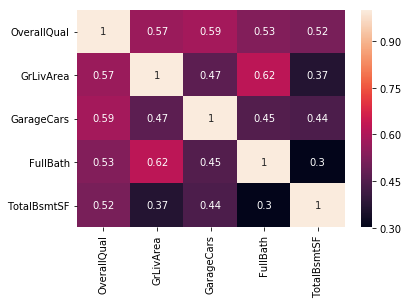

In [64]:
corr = df[features].corr()
sns.heatmap(corr, annot=True);

All the variables appear to be moderately and positively correlated with each other.

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

Not applicable given chosen variables

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [66]:
model = sm.OLS(df[target], sm.add_constant(df[features]))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1083.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:09:06   Log-Likelihood:                 548.07
No. Observations:                1437   AIC:                            -1084.
Df Residuals:                    1431   BIC:                            -1053.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5236      0.023    450.435      

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

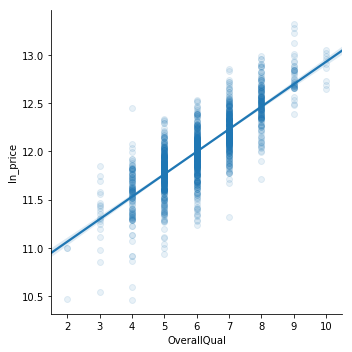

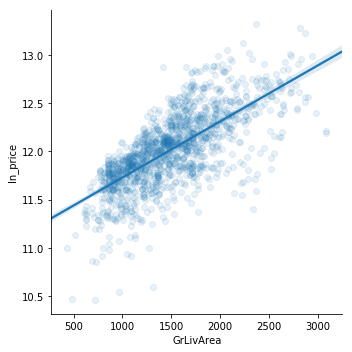

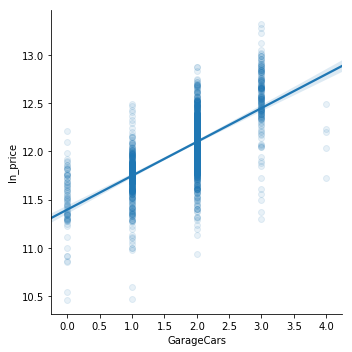

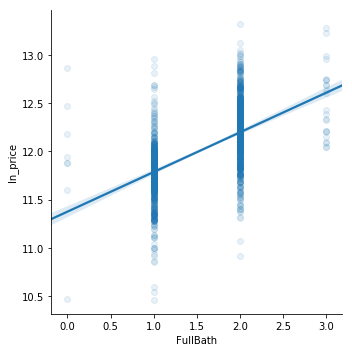

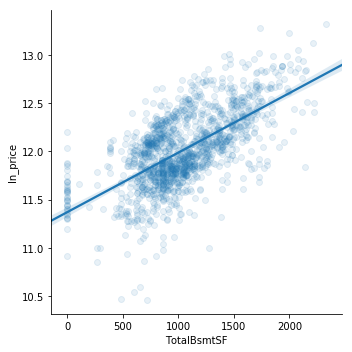

In [69]:
for feature in df[features].columns:
    sns.lmplot(x=feature, y=target, data=df, scatter_kws=dict(alpha=0.1))
    plt.show()

All of the selected features appear to be positively related with the target.

I think the most promising for polynomial features may be GrLivArea and TotalBsmtSF. Further, 'OverallQual' is also a good canidate.

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [72]:
df[features].shape, df[target].shape

((1437, 5), (1437,))

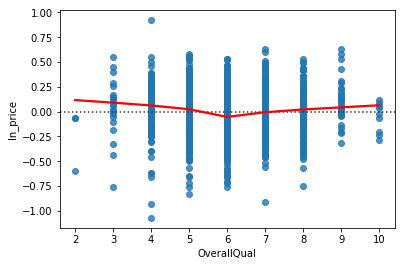

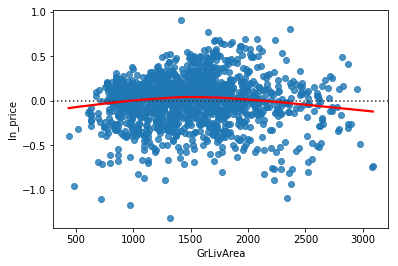

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


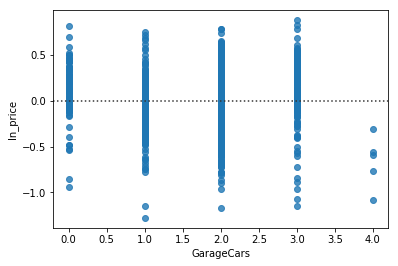

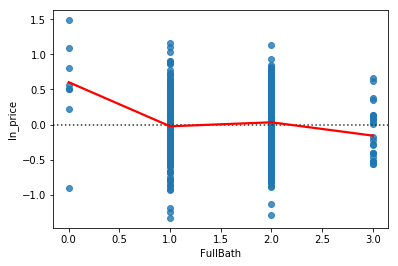

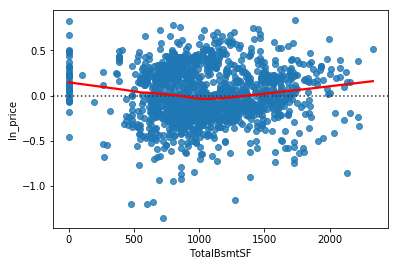

In [73]:
for feature in features: 
    sns.residplot(df[feature], df[target], lowess=True, line_kws=dict(color='r'))
    plt.show()

It appears that 'TotalBsmtSF', 'GrLivArea', and 'OverallQual' are strong canidates for polynomial features. 

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [78]:
df['TotalBsmtSF_cubed'] = df['TotalBsmtSF'] ** 3
df['OverallQual_cubed'] = df['OverallQual'] ** 3
df['GrLivArea_cubed'] = df['GrLivArea'] ** 3

In [81]:
features = ['GarageCars', 
            'FullBath', 
            'TotalBsmtSF_cubed',
            'OverallQual_cubed',
            'GrLivArea_cubed']
target = 'ln_price'

In [82]:
model = sm.OLS(df[target], df[features])
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2768.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:32:24   Log-Likelihood:                -3758.9
No. Observations:                1437   AIC:                             7528.
Df Residuals:                    1432   BIC:                             7554.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GarageCars            2.4635      0.14

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)


# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.